<a href="https://colab.research.google.com/github/Abhijeet088/ML/blob/main/DiagnosingBiasandVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

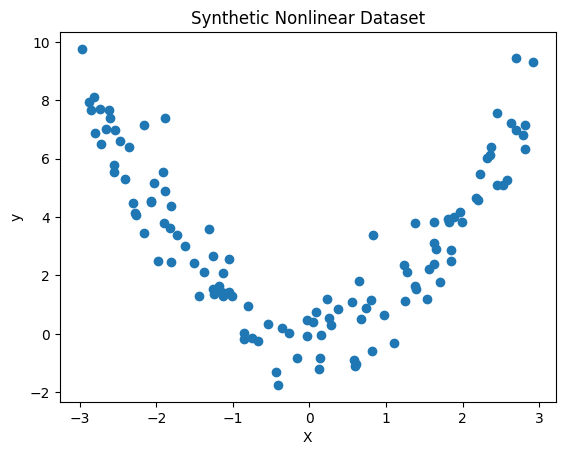

In [ ]:
np.random.seed(42)
m = 120
X = np.random.uniform(-3, 3, m).reshape(-1, 1)
y = X**2 + np.random.normal(0, 1, (m, 1))
plt.scatter(X, y)
plt.title("Synthetic Nonlinear Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_cv, X_test, y_cv, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
print("Train size:", X_train.shape)
print("CV size:", X_cv.shape)
print("Test size:", X_test.shape)

Train size: (72, 1)
CV size: (24, 1)
Test size: (24, 1)


In [12]:
def train_poly_model(degree, model_type="linear", lambda_=0):
  poly = PolynomialFeatures(degree , include_bias = False )
  X_train_poly = poly.fit_transform(X_train)
  X_cv_poly = poly.transform(X_CV)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_poly)
  X_cv_scaled = scaler.transform(X_cv_poly)
  if model_type == "linear":
    model = LinearRegresion()
  else:
    model = Ridge(alpha = lambda_)
    mode.fit(X_trin_scaled , y_train)
    y_train_pred = model(X_train_scaled )
    y_cv_pred = model.predict(X_cv_scaled)
    train_error = mean_squared_error(y_train , y_train_pred )
    cv_error = mean_squared_error(y_cv , y_cv)
    return train_error ,cv_error



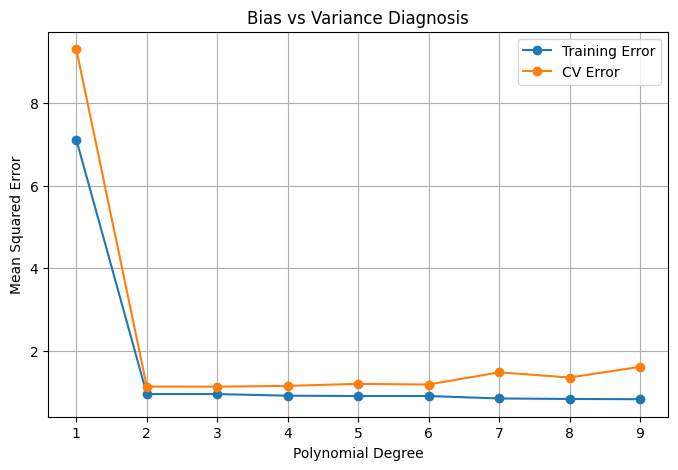

In [19]:
degrees = range(1, 10)

train_errors = []
cv_errors = []

for d in degrees:

    train_err, cv_err = train_poly_model(
        X_train, y_train,
        X_cv, y_cv,
        degree=d
    )

    train_errors.append(train_err)
    cv_errors.append(cv_err)

plt.figure(figsize=(8,5))
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, cv_errors, marker='o', label="CV Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias vs Variance Diagnosis")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lambdas = [0.01,0.1,1,10,50]
train_errors_reg = []
cv_errors_reg = []
for l in lambdas:
  train_err , cv_err = train_poly_model(degree = 6, model_type = "ridge", lambda = 1)
  train_errors_reg.append(train_err)
  cv_errors_reg.append(cv_err)
  plt.plot(lambdas, train_errors_reg, label="Training Error")
plt.plot(lambdas, cv_errors_reg, label="CV Error")
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("MSE")
plt.title("Effect of Regularization")
plt.legend()
plt.show()

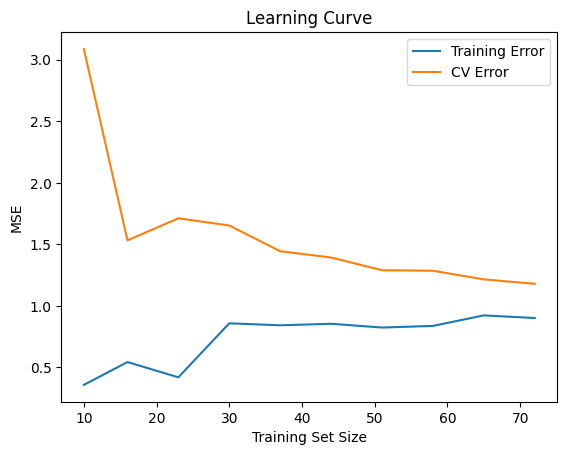

In [20]:
def learning_curve(degree):

    train_sizes = np.linspace(10, len(X_train), 10, dtype=int)
    train_errors = []
    cv_errors = []

    for size in train_sizes:

        X_subset = X_train[:size]
        y_subset = y_train[:size]

        poly = PolynomialFeatures(degree, include_bias=False)
        X_subset_poly = poly.fit_transform(X_subset)
        X_cv_poly = poly.transform(X_cv)

        scaler = StandardScaler()
        X_subset_scaled = scaler.fit_transform(X_subset_poly)
        X_cv_scaled = scaler.transform(X_cv_poly)

        model = LinearRegression()
        model.fit(X_subset_scaled, y_subset)

        y_train_pred = model.predict(X_subset_scaled)
        y_cv_pred = model.predict(X_cv_scaled)

        train_errors.append(mean_squared_error(y_subset, y_train_pred))
        cv_errors.append(mean_squared_error(y_cv, y_cv_pred))

    plt.plot(train_sizes, train_errors, label="Training Error")
    plt.plot(train_sizes, cv_errors, label="CV Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

learning_curve(degree=6)